# Exploratory Data Analysis - AI Driven Customer Insights Project
This notebook explores and analyzes the e-commerce dataset to understand customer behavior and product performance.

1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 2. Loading the Dataset

In [3]:
df = pd.read_csv(
    '/Users/anshrathore/Desktop/AI-Driven-Customer-Insights-and-Recommendation-System/src/notebook/data/data.csv',
    encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


4. Checking for all the Missing Values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Convert date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
dtype: int64

5. CLEAN REMAINING NaN VALUES

In [7]:
# Drop rows with missing CustomerID (since we can’t identify those customers)
df = df.dropna(subset=['CustomerID'])

# Replace missing product names
df['Description'] = df['Description'].fillna('Unknown')

# Replace missing UnitPrice or Quantity
df['UnitPrice'] = df['UnitPrice'].fillna(0)
df['Quantity'] = df['Quantity'].fillna(0)

# Recalculate TotalAmount 
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64


8. Basic Descriptive Statistics

In [8]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829,406829.000000
unique,22190,3684,3896,NaN,NaN,NaN,NaN,37,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542,2077,2070,NaN,NaN,NaN,NaN,361878,NaN
mean,NaN,NaN,NaN,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,NaN,20.401854
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,-168469.600000
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,NaN,4.200000
50%,NaN,NaN,NaN,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,NaN,11.100000
75%,NaN,NaN,NaN,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,NaN,19.500000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN,168469.600000


9. Top Countries by Transactions

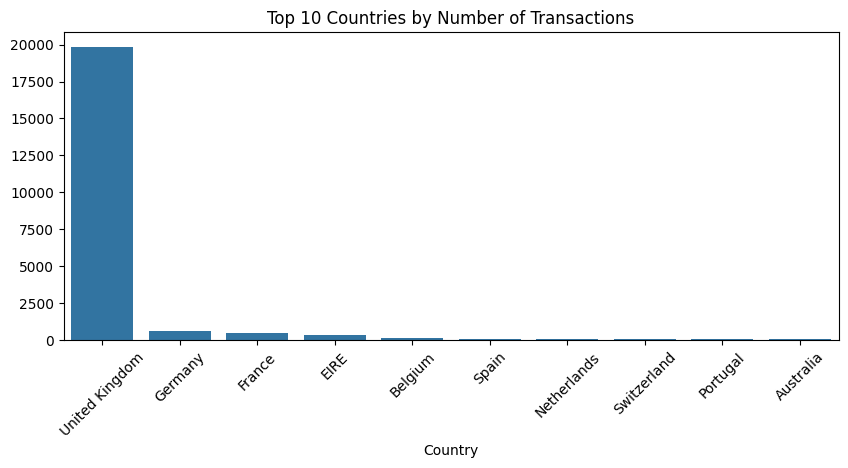

In [9]:
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values)
plt.title("Top 10 Countries by Number of Transactions")
plt.xticks(rotation=45)
plt.show()

10. Top Selling Products

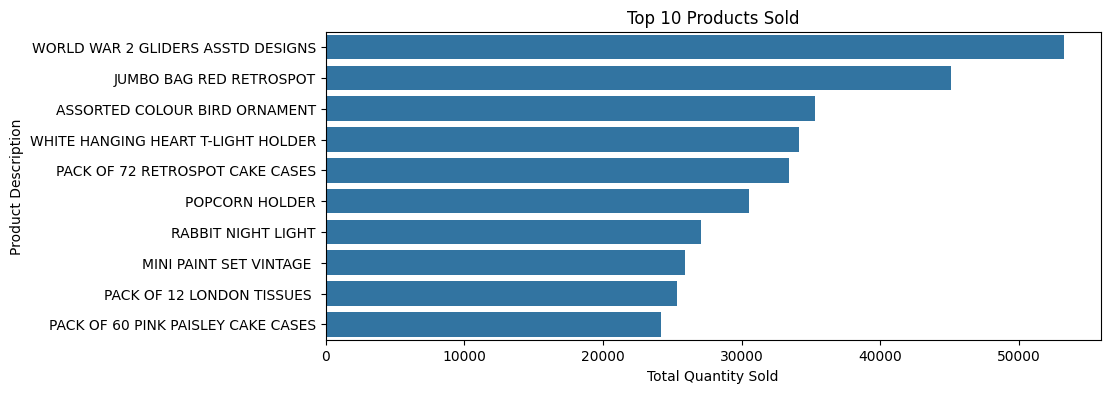

In [10]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()

11. Total Revenue by Country

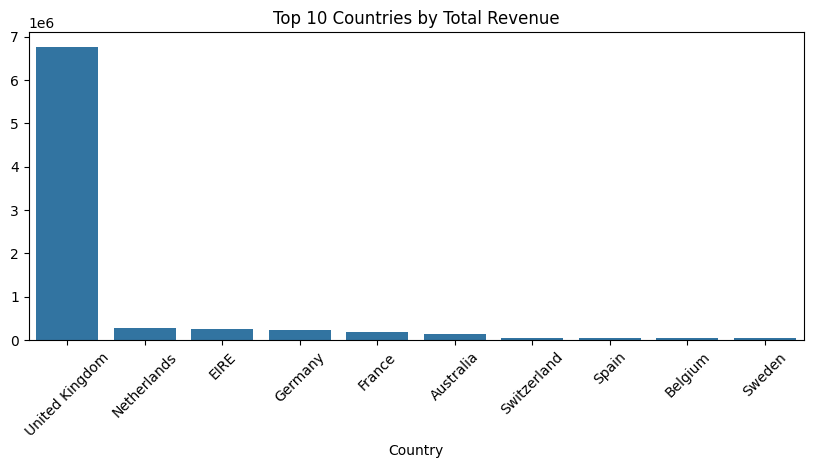

In [11]:
revenue_country = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=revenue_country.index, y=revenue_country.values)
plt.title("Top 10 Countries by Total Revenue")
plt.xticks(rotation=45)
plt.show()

12. Monthly Sales Trend

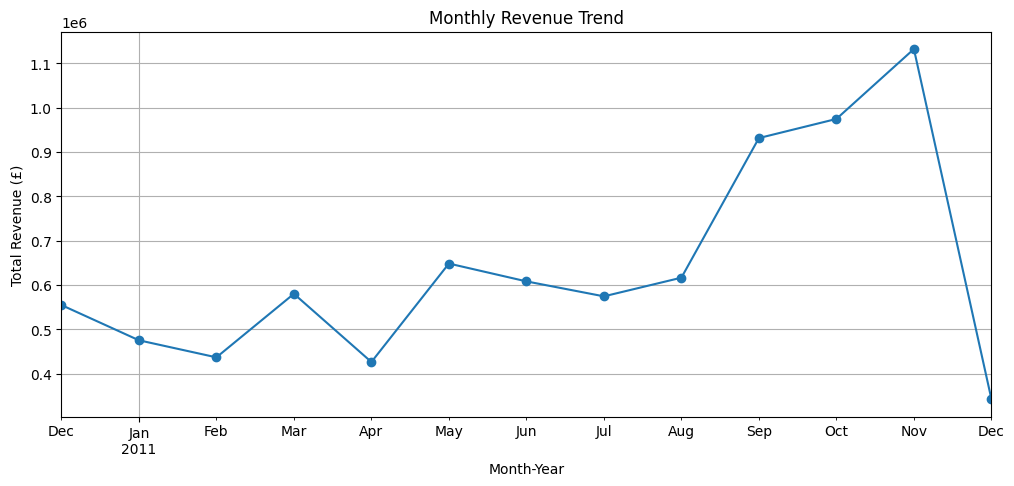

In [12]:
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['TotalAmount'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (£)")
plt.grid(True)
plt.show()

 13. Build RFM Table (Recency, Frequency, Monetary)

In [13]:
import datetime as dt

# Latest transaction date + 1 day
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # For Recency
    'InvoiceNo': 'nunique',                                 # For Frequency
    'TotalAmount': 'sum'                                    # For Monetary
}).reset_index()

rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [14]:
rfm.isnull().sum()

CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

# Exploring Data

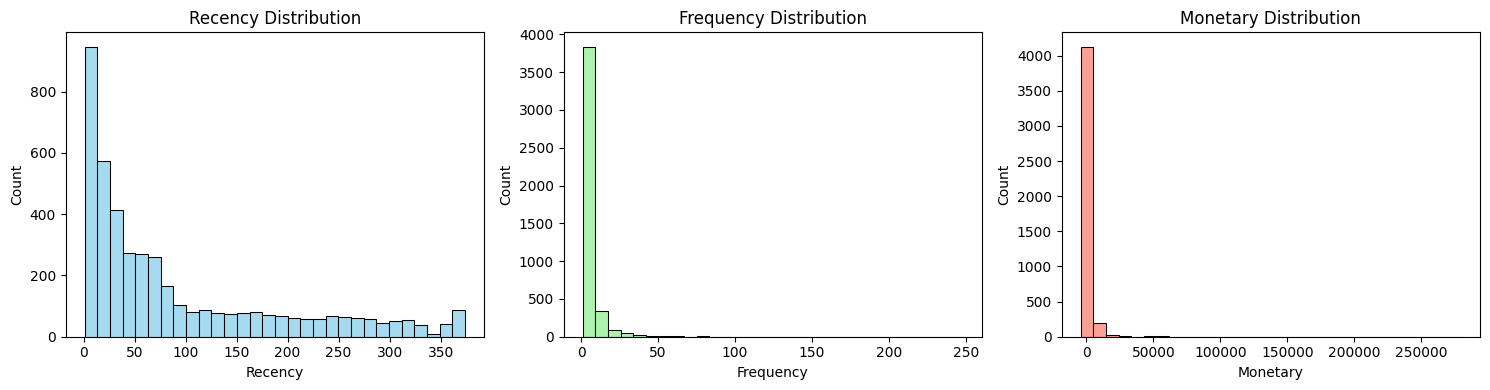

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, color='lightgreen')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, color='salmon')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

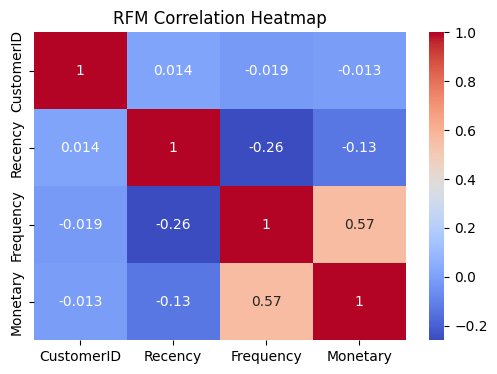

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.title("RFM Correlation Heatmap")
plt.show()

 16. Summary of Insights

In [17]:
print(" Dataset Shape:", df.shape)
print(" Unique Customers:", df['CustomerID'].nunique())
print(" Unique Products:", df['Description'].nunique())
print(" Date Range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())

print("\n --- Key Business Insights ---")
print("United Kingdom contributes the majority of revenue.")
print("Sales peak during November–December (holiday season).")
print("A small set of loyal customers drive major sales volume.")
print("High Recency scores highlight inactive customers—re-engagement opportunity.")


 Dataset Shape: (406829, 10)
 Unique Customers: 4372
 Unique Products: 3896
 Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00

 --- Key Business Insights ---
United Kingdom contributes the majority of revenue.
Sales peak during November–December (holiday season).
A small set of loyal customers drive major sales volume.
High Recency scores highlight inactive customers—re-engagement opportunity.
